In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
data = pd.read_csv('/content/covid_19_clean_complete.csv')

In [ ]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0.0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0.0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0.0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0.0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0.0,Africa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31891 entries, 0 to 31890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  9535 non-null   object 
 1   Country/Region  31891 non-null  object 
 2   Lat             31891 non-null  float64
 3   Long            31891 non-null  float64
 4   Date            31891 non-null  object 
 5   Confirmed       31891 non-null  int64  
 6   Deaths          31891 non-null  int64  
 7   Recovered       31891 non-null  int64  
 8   Active          31890 non-null  float64
 9   WHO Region      31890 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 2.4+ MB


In [ ]:
data.isnull().sum()


Province/State    22356
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                1
WHO Region            1
dtype: int64

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# Fill missing values in 'Province/State' with a placeholder
data['Province/State'].fillna('Unknown', inplace=True)

In [ ]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Unknown,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0.0,Eastern Mediterranean
1,Unknown,Albania,41.15330,20.168300,2020-01-22,0,0,0,0.0,Europe
2,Unknown,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0.0,Africa
3,Unknown,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0.0,Europe
4,Unknown,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0.0,Africa


In [ ]:
# Fill missing 'Active' with the difference between confirmed, deaths, and recovered
data['Active'].fillna(data['Confirmed'] - data['Deaths'] - data['Recovered'], inplace=True)

In [ ]:
data.dropna(inplace=True)

In [ ]:
# Exploratory Data Analysis (EDA)

# Summary statistics
data.describe()


,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
count,31890.000000,31890.000000,31890,3.189000e+04,31890.000000,31890.000000,3.189000e+04
mean,21.426992,23.511408,2020-03-22 14:13:17.892756224,5.276016e+03,350.859172,1608.316118,3.316841e+03
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000,-6.000000e+00
25%,7.873054,-15.310100,2020-02-21 00:00:00,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,23.634500,21.745300,2020-03-23 00:00:00,2.400000e+01,0.000000,1.000000,8.000000e+00
75%,41.204380,80.771797,2020-04-22 00:00:00,4.840000e+02,6.000000,107.000000,2.070000e+02
max,71.706900,178.065000,2020-05-23 00:00:00,1.608653e+06,97025.000000,350135.000000,1.190338e+06
std,24.962833,70.462359,NaN,4.622823e+04,3204.660760,11395.728763,3.486419e+04


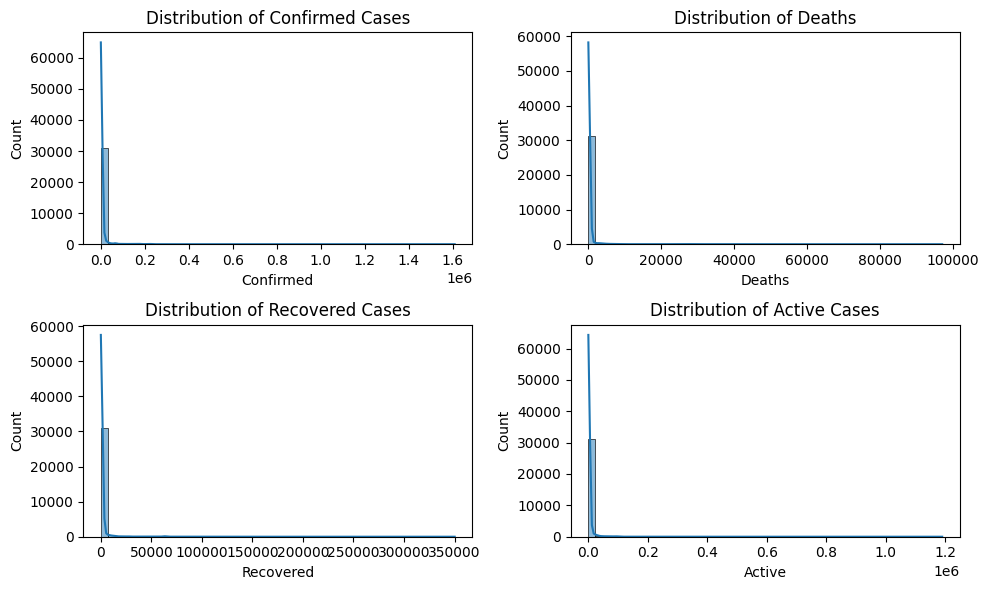

In [ ]:
# Distribution plots
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['Confirmed'], bins=50, kde=True).set_title('Distribution of Confirmed Cases')

plt.subplot(2, 2, 2)
sns.histplot(data['Deaths'], bins=50, kde=True).set_title('Distribution of Deaths')

plt.subplot(2, 2, 3)
sns.histplot(data['Recovered'], bins=50, kde=True).set_title('Distribution of Recovered Cases')

plt.subplot(2, 2, 4)
sns.histplot(data['Active'], bins=50, kde=True).set_title('Distribution of Active Cases')

plt.tight_layout()
plt.show()

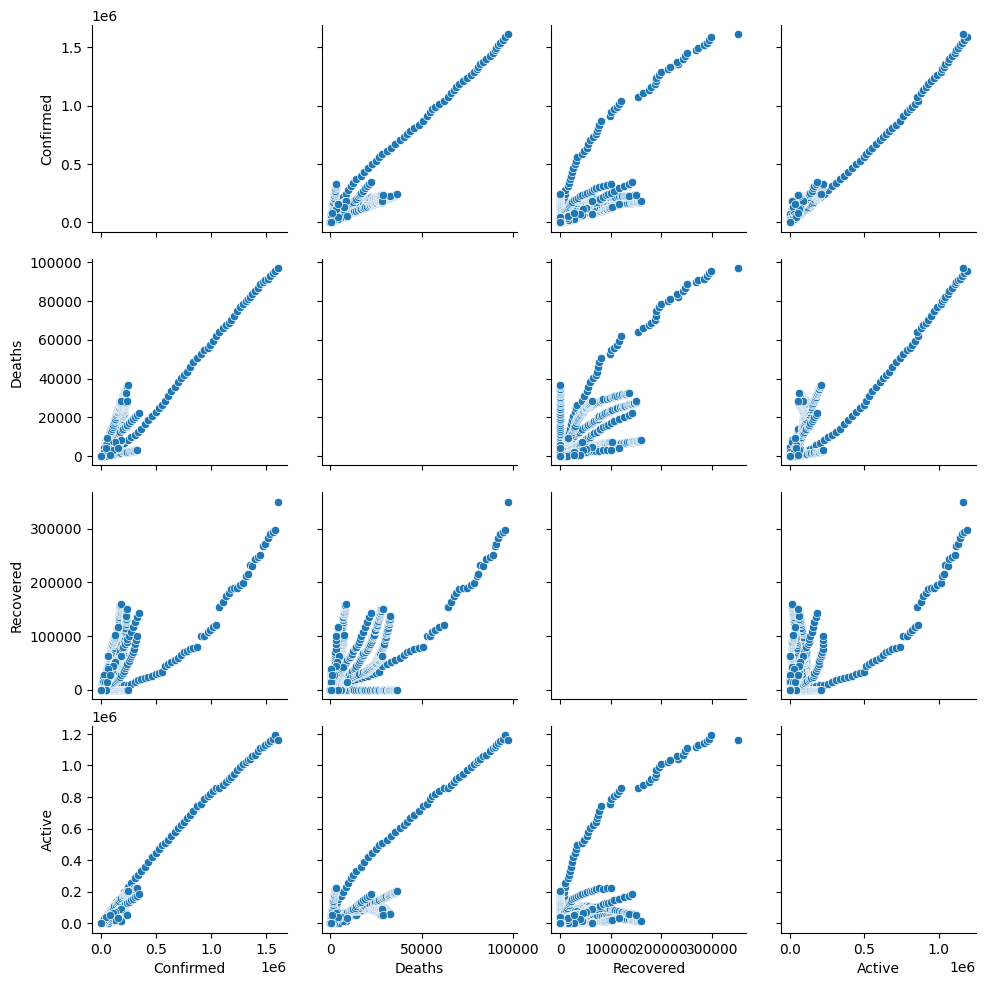

In [ ]:
# Pairplot to see relationships
sns.pairplot(data[['Confirmed', 'Deaths', 'Recovered', 'Active']])
plt.show()

In [ ]:
# Time Series Analysis

# Group by Date and sum up the values
time_series_data = data.groupby('Date').sum()

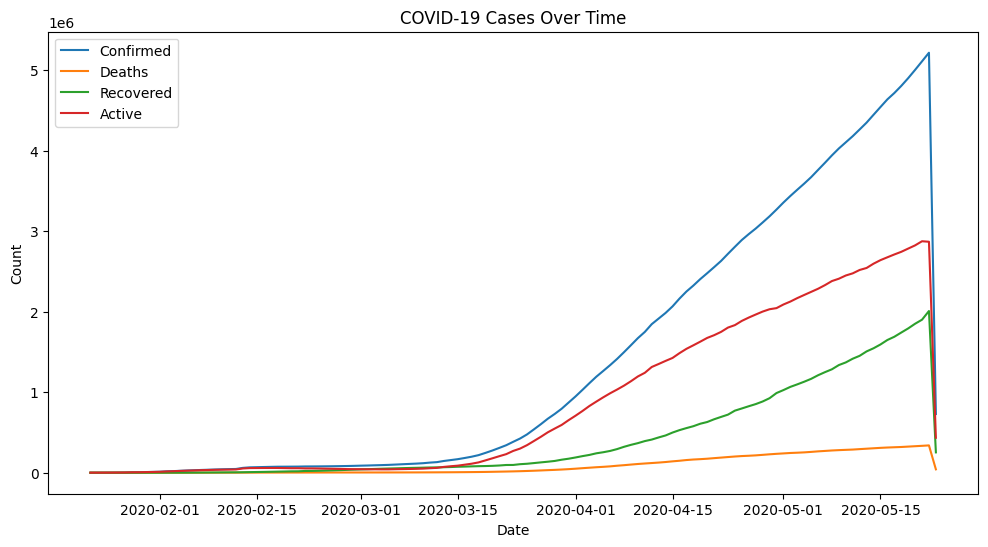

In [ ]:
# Plotting the time series data
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data['Confirmed'], label='Confirmed')
plt.plot(time_series_data.index, time_series_data['Deaths'], label='Deaths')
plt.plot(time_series_data.index, time_series_data['Recovered'], label='Recovered')
plt.plot(time_series_data.index, time_series_data['Active'], label='Active')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Cases Over Time')
plt.show()

In [23]:
# Feature Engineering

# Create Mortality Rate and Recovery Rate
data['Mortality Rate'] = data['Deaths'] / data['Confirmed']
data['Recovery Rate'] = data['Recovered'] / data['Confirmed']

# Fill any infinite values resulting from division by zero
data.replace([np.inf, -np.inf], 0, inplace=True)


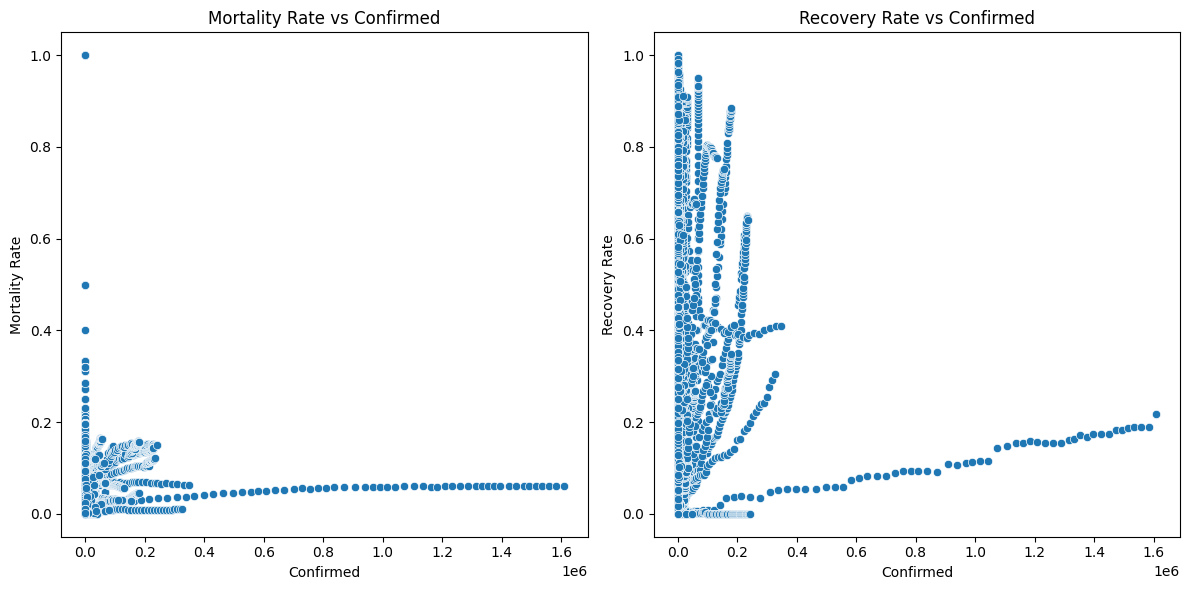

In [24]:
# Scatter plots for new features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Confirmed', y='Mortality Rate', data=data).set_title('Mortality Rate vs Confirmed')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Confirmed', y='Recovery Rate', data=data).set_title('Recovery Rate vs Confirmed')

plt.tight_layout()
plt.show()

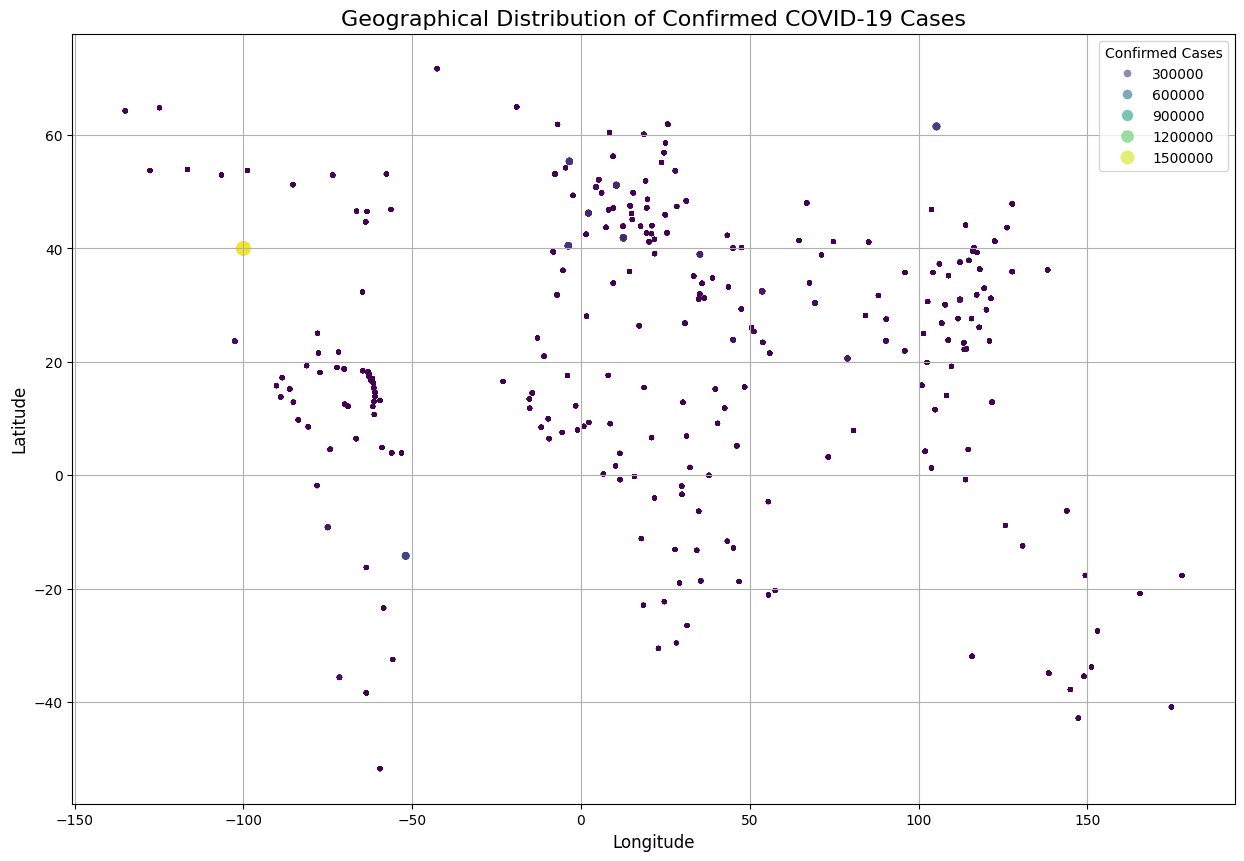

In [51]:
# Filter out rows with zero confirmed cases to avoid clutter
filtered_data = data[data['Confirmed'] > 0]

# Plot the geographical distribution
plt.figure(figsize=(15, 10))
world_map = sns.scatterplot(
    x='Long', y='Lat', hue='Confirmed', size='Confirmed', data=filtered_data,
    palette='viridis', sizes=(10, 100), alpha=0.6, edgecolor=None
)

# Enhance the plot with titles and labels
plt.title('Geographical Distribution of Confirmed COVID-19 Cases', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(loc='upper right', title='Confirmed Cases', fontsize=10)
plt.grid(True)
plt.show()

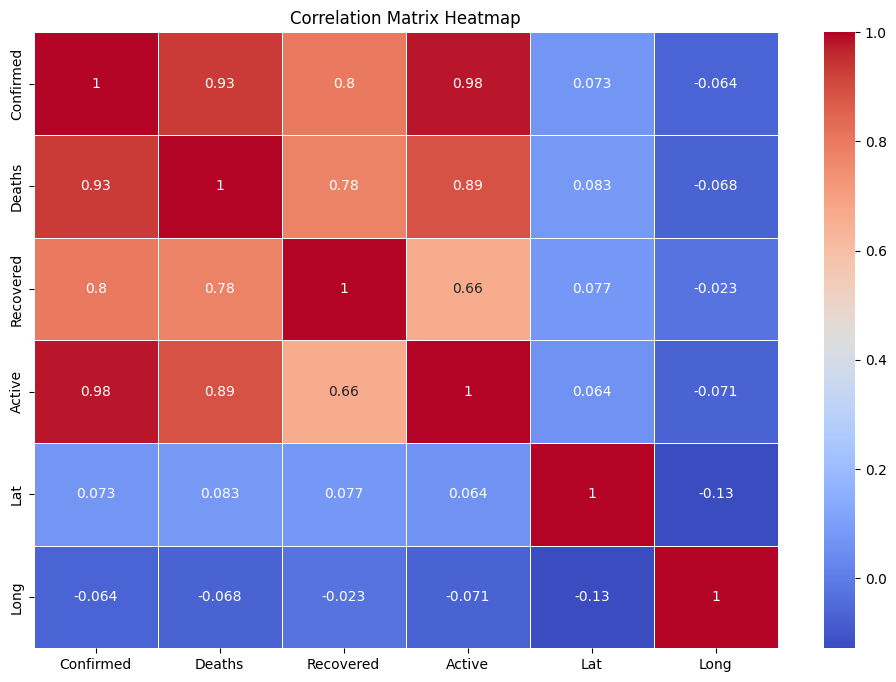

In [49]:
numerical_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Lat', 'Long']
numerical_data = data[numerical_columns]

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [27]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Mortality Rate,Recovery Rate
0,Unknown,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0.0,Eastern Mediterranean,NaN,NaN
1,Unknown,Albania,41.15330,20.168300,2020-01-22,0,0,0,0.0,Europe,NaN,NaN
2,Unknown,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0.0,Africa,NaN,NaN
3,Unknown,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0.0,Europe,NaN,NaN
4,Unknown,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0.0,Africa,NaN,NaN


In [28]:
y.fillna(0, inplace=True)

In [29]:
# Features and target variable
X = data[['Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
y = data['Mortality Rate']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)



Mean Squared Error: 1.390308459875226e-06


In [31]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.390308459875226e-06
Root Mean Squared Error: 0.0011791134211242046
Mean Absolute Error: 0.0002814793552398564
R-squared: 0.9991598304775556


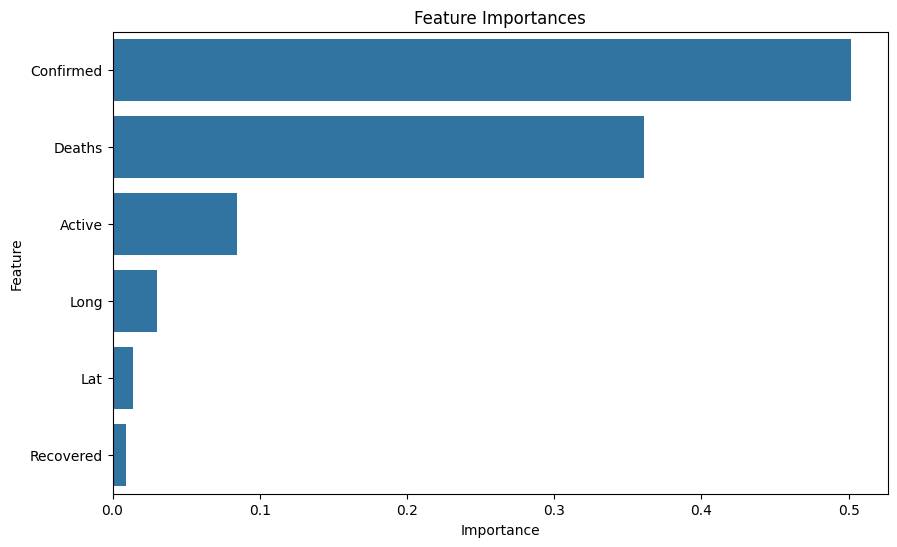

In [32]:
# Feature Importances
importances = model.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances).set_title('Feature Importances')
plt.show()

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Predictions
gbr_y_pred = gbr_model.predict(X_test)

# Evaluate the model
gbr_mse = mean_squared_error(y_test, gbr_y_pred)
gbr_rmse = np.sqrt(gbr_mse)
gbr_mae = mean_absolute_error(y_test, gbr_y_pred)
gbr_r2 = r2_score(y_test, gbr_y_pred)

print(f'Gradient Boosting Regressor - MSE: {gbr_mse}, RMSE: {gbr_rmse}, MAE: {gbr_mae}, R-squared: {gbr_r2}')


Gradient Boosting Regressor - MSE: 6.816895049779331e-05, RMSE: 0.008256449024719604, MAE: 0.0032052621099275245, R-squared: 0.9588052031342692


In [35]:
from sklearn.svm import SVR

# Initialize the model
svr_model = SVR(kernel='rbf')

# Train the model
svr_model.fit(X_train, y_train)

# Predictions
svr_y_pred = svr_model.predict(X_test)

# Evaluate the model
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

print(f'Support Vector Regressor - MSE: {svr_mse}, RMSE: {svr_rmse}, MAE: {svr_mae}, R-squared: {svr_r2}')


Support Vector Regressor - MSE: 0.008341472194264916, RMSE: 0.09133166041556956, MAE: 0.08660325360237818, R-squared: -4.040788366178651


In [38]:
from xgboost import XGBRegressor

# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f'XGBoost Regressor - MSE: {xgb_mse}, RMSE: {xgb_rmse}, MAE: {xgb_mae}, R-squared: {xgb_r2}')


XGBoost Regressor - MSE: 2.0644829473286005e-06, RMSE: 0.0014368308694236078, MAE: 0.000557205825786611, R-squared: 0.9987524238670695


In [39]:
from lightgbm import LGBMRegressor

# Initialize the model
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Predictions
lgbm_y_pred = lgbm_model.predict(X_test)

# Evaluate the model
lgbm_mse = mean_squared_error(y_test, lgbm_y_pred)
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_mae = mean_absolute_error(y_test, lgbm_y_pred)
lgbm_r2 = r2_score(y_test, lgbm_y_pred)

print(f'LightGBM Regressor - MSE: {lgbm_mse}, RMSE: {lgbm_rmse}, MAE: {lgbm_mae}, R-squared: {lgbm_r2}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014003 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1524
[LightGBM] [Info] Number of data points in the train set: 25512, number of used features: 6
[LightGBM] [Info] Start training from score 0.018188
LightGBM Regressor - MSE: 1.458935903330759e-05, RMSE: 0.0038196019469713843, MAE: 0.0010336680159409347, R-squared: 0.9911835861137722


In [41]:
from sklearn.ensemble import StackingRegressor

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Define the meta model
meta_model = XGBRegressor(n_estimators=100, random_state=42)

# Initialize and train the stacking regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)

# Predictions
stacking_y_pred = stacking_model.predict(X_test)

# Evaluate the model
stacking_mse = mean_squared_error(y_test, stacking_y_pred)
stacking_rmse = np.sqrt(stacking_mse)
stacking_mae = mean_absolute_error(y_test, stacking_y_pred)
stacking_r2 = r2_score(y_test, stacking_y_pred)

print(f'Stacking Regressor - MSE: {stacking_mse}, RMSE: {stacking_rmse}, MAE: {stacking_mae}, R-squared: {stacking_r2}')


Stacking Regressor - MSE: 1.194325044188881e-05, RMSE: 0.0034559008148222093, MAE: 0.0005194340236913314, R-squared: 0.9927826411837442


In [46]:
# Assuming the evaluation results are stored in variables
evaluation_results = {
    'Model': [ 'Gradient Boosting', 'XGBoost', 'LightGBM', 'SVR',],
    'MSE': [ gbr_mse, xgb_mse, lgbm_mse, svr_mse,],
    'RMSE': [ gbr_rmse, xgb_rmse, lgbm_rmse,  svr_rmse],
    'MAE': [ gbr_mae, xgb_mae, lgbm_mae,  svr_mae, ],
    'R-squared': [ gbr_r2, xgb_r2, lgbm_r2,  svr_r2]
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(evaluation_results)

# Display the comparison
print(comparison_df)


               Model       MSE      RMSE       MAE  R-squared
0  Gradient Boosting  0.000068  0.008256  0.003205   0.958805
1            XGBoost  0.000002  0.001437  0.000557   0.998752
2           LightGBM  0.000015  0.003820  0.001034   0.991184
3                SVR  0.008341  0.091332  0.086603  -4.040788


best model applicable hear is randomforest